<a href="https://colab.research.google.com/github/PIYUSHSHARMA2001/Machine_Learning_Projects/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [13]:
#loading CSV data to pandas DataFrame
gold_data = pd.read_csv("https://raw.githubusercontent.com/PIYUSHSHARMA2001/Machine_Learning_Projects/main/Gold_Price_Prediction.csv")

In [14]:
# printing first five rows in the dataframe
gold_data.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [15]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [16]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [17]:
#getting some information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [18]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [19]:
# getting the staistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

1> Positive Correlation: directly proportional

2> Negative correlation: indirectly proportional

In [22]:
correlation = gold_data.corr()

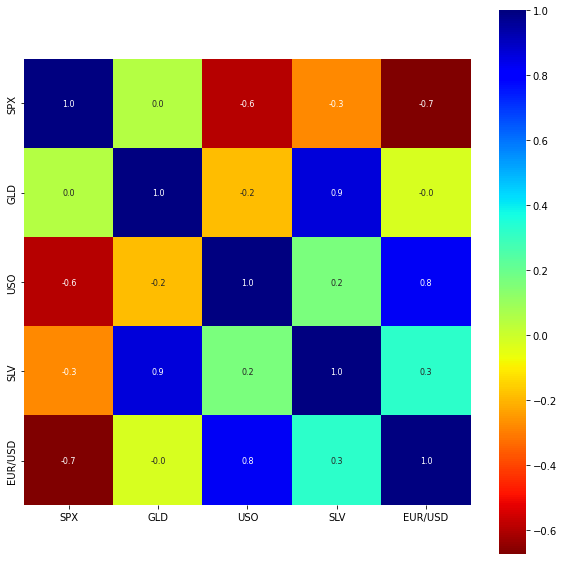

In [25]:
#constructing  a heatmap to understand the correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, square = True, fmt ='.1f',annot = True,annot_kws={'size':8},cmap = 'jet_r')# negative values indicate negative correlation and +ve values indicate positive values
#cbar is color bar indicating the color values relation
#square is the suare shape of heatmap 
#fmt is the floating point value and .1f is 1 place after decimal
#annot is annotation of the columns such as spx,gld,uso
#annot_kws gives the size of annotation
#cmap is the coloring of the heatmap

In [26]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


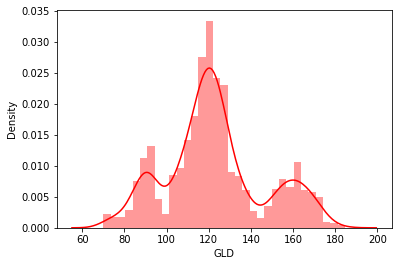

In [29]:
# checking the distribution of gold price
sns.distplot(gold_data['GLD'],color='red')

Splitting the features and target

In [33]:
X= gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [35]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [36]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [38]:
#splitting into training and test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training

RandomForestRegressor



In [39]:
regressor = RandomForestRegressor(n_estimators=100)

In [40]:
#training this model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model  Evaluation

In [41]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [42]:
print(test_data_prediction)

[168.42849964  82.32419961 115.84730027 127.51570064 120.59550151
 154.64809782 150.56409918 126.16910042 117.48019893 125.93990096
 116.87460072 171.41010082 141.56549896 167.75669932 115.0920998
 117.30980051 139.05600295 170.4357015  159.91950263 159.1135996
 155.05329948 125.53970015 175.4073997  157.76480349 125.2648005
  93.86629948  78.15879995 120.77679998 119.08529934 167.58699949
  88.05980011 125.4317003   91.06690077 117.82180021 121.04689926
 136.70900111 115.54500099 115.10830069 149.81989972 106.96290111
 104.46500247  87.24609785 126.40970084 117.84829993 152.41309891
 119.74570042 108.46319984 108.35129849  93.16350052 127.0494981
  75.16050037 113.64899929 121.23920039 111.26989921 118.85079909
 120.24679961 159.80340096 168.39210144 146.9137965   85.72789836
  94.2705002   86.7784985   90.78190007 119.04170058 126.42840075
 127.35930018 169.21039979 122.32719927 117.22749899  98.67590034
 167.84040158 142.96149865 132.32020271 121.25390204 121.30379938
 120.10440067 

In [43]:
# R squared error to check metrics of the test data
error_score = metrics.r2_score(Y_test,test_data_prediction)

In [44]:
print("R squared Error = ",error_score*100)

R squared Error =  98.87282126059822


Compare teh actual values and predicted values in a plot

In [45]:
Y_test = list(Y_test)

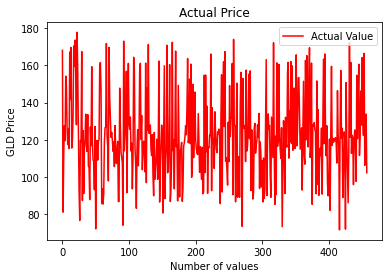

In [54]:
plt.plot(Y_test, color='red',label = 'Actual Value')
plt.title("Actual Price")
plt.xlabel("Number of values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()

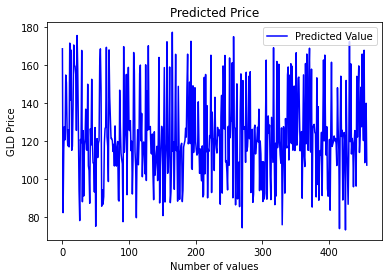

In [55]:
plt.plot(test_data_prediction, color='blue',label = 'Predicted Value')
plt.title("Predicted Price")
plt.xlabel("Number of values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()

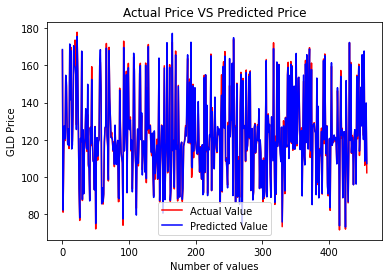

In [53]:
plt.plot(Y_test, color='red',label = 'Actual Value')
plt.plot(test_data_prediction, color='blue',label = 'Predicted Value')
plt.title("Actual Price VS Predicted Price")
plt.xlabel("Number of values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()